IMPORTAMOS LAS LIBRERIAS NECESARIAS

In [25]:
import csv
import math
import random
from math import *

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Definicion de estilo de las graficas
sns.set_style("darkgrid")

DECLARAMOS LAS FUNCIONES PARA EL PROCEDIMIENTO MANUAL

In [26]:
# Se cambian los nombres de las clases categóricas a datos numéricos
# Ejemplo: sí y no codificados en 1 y 0

def encodeClass(mydata):
    classes = []
    for i in range(len(mydata)):
        if mydata[i][-1] not in classes:
            classes.append(mydata[i][-1])
    for i in range(len(classes)):
        for j in range(len(mydata)):
            if mydata[j][-1] == classes[i]:
                mydata[j][-1] = i
    return mydata  

SE DIVIDEN LOS DATOS PARA UN MEJOR PROCESAMIENTO DE LA INFORMACION

In [27]:
def splitting(mydata, ratio):
    train_num = int(len(mydata) * ratio)
    train = []
    # inicialmente el conjunto de prueba tendrá todo el conjunto de datos
    test = list(mydata)
    while len(train) < train_num:
        # índice generado aleatoriamente desde el rango 0
        # a la longitud del conjunto de prueba
        index = random.randrange(len(test))
        # del conjunto de prueba, extraiga filas de datos y póngalo en marcha
        train.append(test.pop(index))
    return train, test #Dividiendo los datos

SE AGRUPAN LOS DATOS DE CADA CLASE Y SE ALMACENAN EN UN DICCIONARIO

In [28]:
# Ejemplo: dict[sí] y dict[no]
def groupUnderClass(mydata):
    dict = {}
    for i in range(len(mydata)):
        if (mydata[i][-1] not in dict):
            dict[mydata[i][-1]] = []
        dict[mydata[i][-1]].append(mydata[i])
    return dict

SE CALCULA LA MEDIA

In [29]:
def mean(numbers):
    return sum(numbers)/float(len(numbers))

SE CALCULA LA DESVIACION ESTANDAR

In [30]:
def std_dev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

MEDIA Y DESVIACION ESTANDAR

In [31]:
def meanAndStdDev(mydata):
    info = [(mean(attribute), std_dev(attribute)) for attribute in zip(*mydata)]
    del info[-1]
    return info

HALLAMOS LA MEDIA Y LA DESVIACION ESTANDAR PARA CADA CLASE

In [32]:
def meanAndStdDevForClass(mydata):
    info = {}
    dict = groupUnderClass(mydata)
    for classValue, instances in dict.items():
        info[classValue] = meanAndStdDev(instances)
    return info

SE CALCULA LA FUNCION DE DENSIDAD MEDIANTE LA PROBABILIDAD GAUSSIANA

In [33]:
def calculateGaussianProbability(x, mean, stdev):
    expo = exp(-((x - mean) ** 2) / (2 * stdev ** 2))
    return (1 / (sqrt(2 * pi) * stdev)) * expo

SE CALCULA LA PROBABILIDAD DE CADA CLASE

In [34]:
def calculateClassProbabilities(info, test):
    probabilities = {}
    for classValue, classSummaries in info.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, std_dev = classSummaries[i]
            x = test[i]
            probabilities[classValue] *= calculateGaussianProbability(x, mean, std_dev)
    return probabilities

SE HALLA LA PREDICCION: La probabilidad más alta sería la predicción

In [35]:
def predict(info, test):
    probabilities = calculateClassProbabilities(info, test)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

RETORNAMOS LAS PREDICCIONES PARA UN CONJUNTO DE EJEMPLOS

In [36]:
def getPredictions(info, test):
    predictions = []
    for i in range(len(test)):
        result = predict(info, test[i])
        predictions.append(result)
    return predictions

SE CALCULA LA PUNTUACIÓN DE PRECISIÓN

In [37]:
def accuracy_rate(test, predictions):
    correct = 0
    for i in range(len(test)):
        if test[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(test))) * 100.0

### TRATAMIENTO DE LOS DATOS
Se especifica la ruta de los datos en el sistema

In [38]:
# Ruta de datos en su sistema
filename = r'Breast_cancer_data.csv'
dataset = pd.read_csv(filename,  delimiter=',')
dataset.head(-11)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.990,10.38,122.80,1001.0,0.11840,0
1,20.570,17.77,132.90,1326.0,0.08474,0
2,19.690,21.25,130.00,1203.0,0.10960,0
3,11.420,20.38,77.58,386.1,0.14250,0
4,20.290,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
553,9.333,21.94,59.01,264.0,0.09240,1
554,12.880,28.92,82.50,514.3,0.08123,1
555,10.290,27.61,65.67,321.4,0.09030,1
556,10.160,19.59,64.73,311.7,0.10030,1


MOSTRAR CADA CARACTERISTICA DE LOS DATOS MEDIANTE UN HISTOGRAMA

Text(0.5, 1.0, 'Diagnosis')

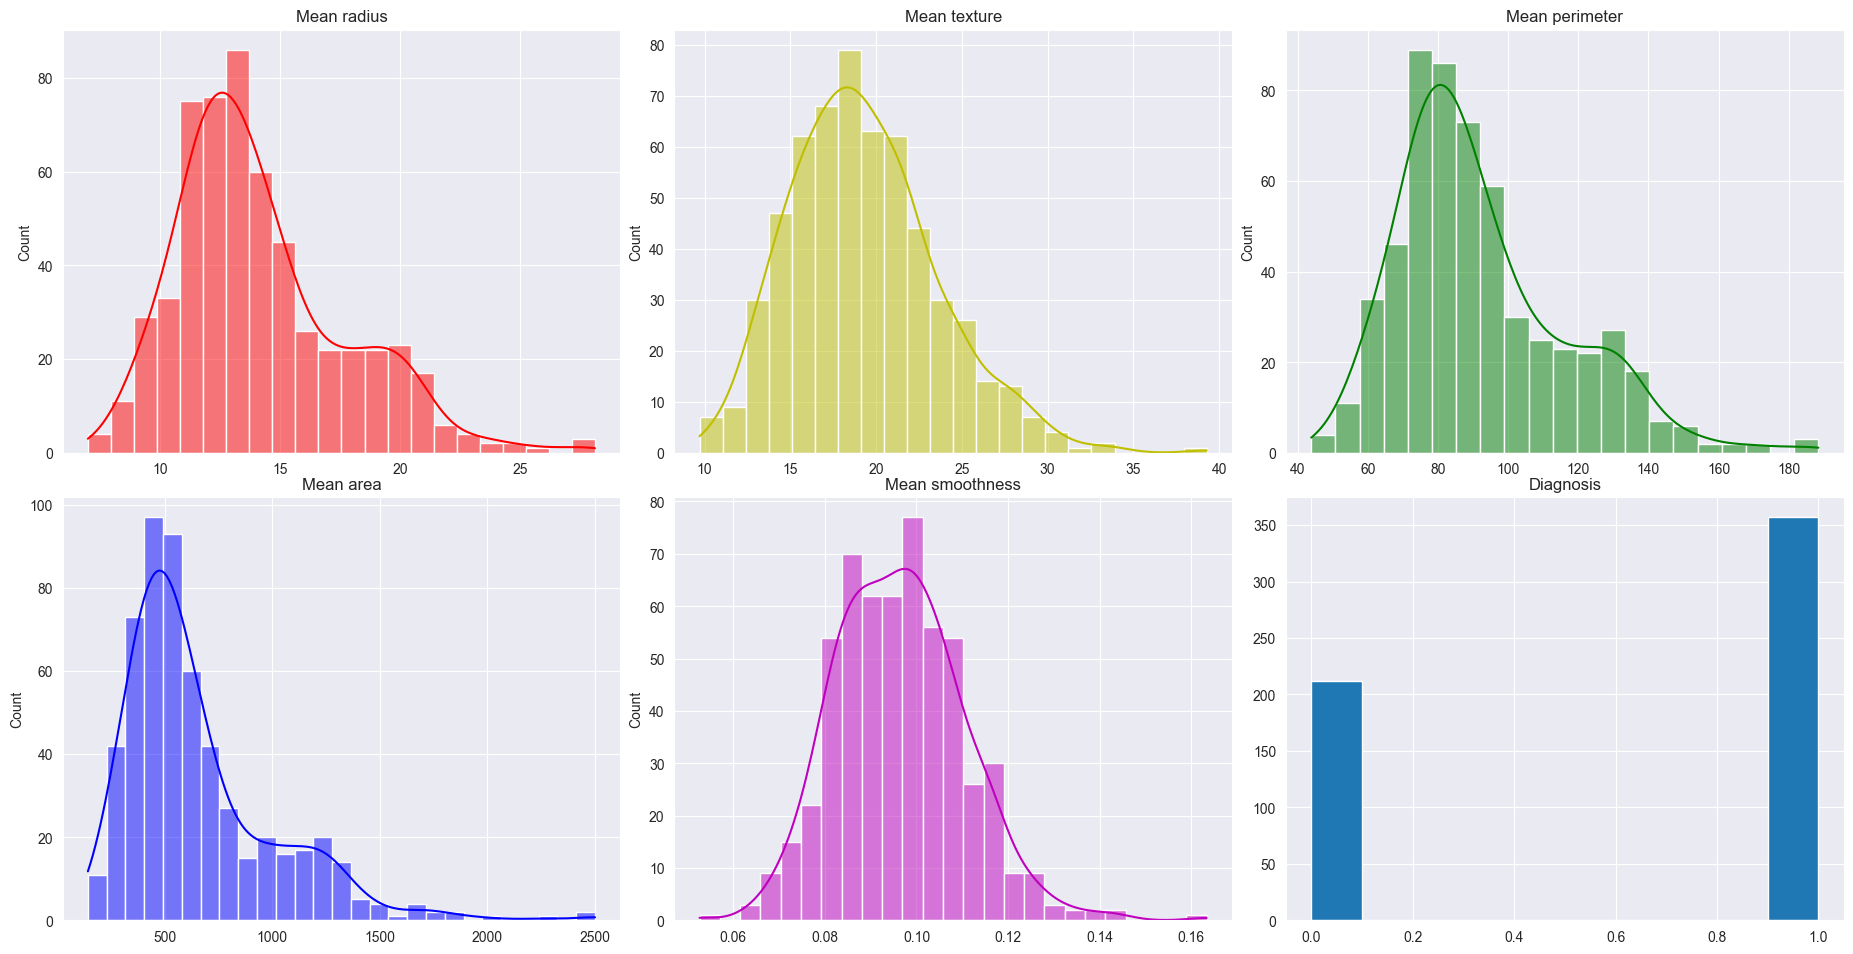

In [39]:
fig, axes = plt.subplots(2,3)
fig.set_size_inches(18.5, 9.5)
fig.tight_layout()
sns.histplot(dataset.values[:,0],ax=axes[0][0], kde=True, color='r').set_title("Mean radius")
sns.histplot(dataset.values[:,1],ax=axes[0][1], kde=True, color='y').set_title("Mean texture")
sns.histplot(dataset.values[:,2],ax=axes[0][2], kde=True, color='g').set_title("Mean perimeter")
sns.histplot(dataset.values[:,3],ax=axes[1][0], kde=True, color='b').set_title("Mean area")
sns.histplot(dataset.values[:,4],ax=axes[1][1], kde=True, color='m').set_title("Mean smoothness")
axes[1][2].hist(dataset.values[:,5])
axes[1][2].set_title("Diagnosis")

### SE OBTIENE UN RECUENTO DEL NÚMERO DE MALIGNOS (1) O BENIGNOS (0)

1    357
0    212
Name: diagnosis, dtype: int64


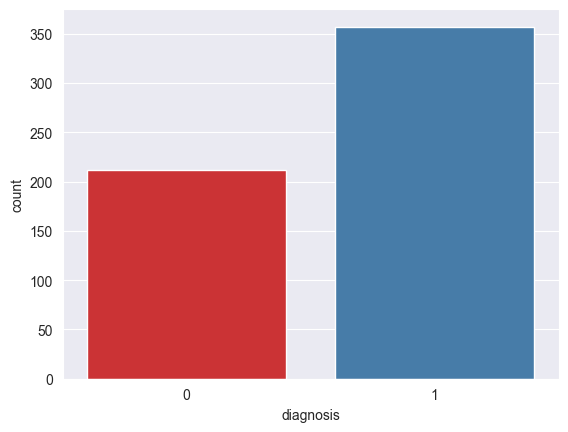

In [40]:
print(dataset['diagnosis'].value_counts())
sns.countplot(x = dataset['diagnosis'], palette="Set1");

## PROCEDIMIENTO MANUAL
PREPARAMOS LOS DATOS

In [57]:
# Cargar el archivo y guardarlo en la lista mydata
mydata = csv.reader(open(filename, "rt"))
mydata = list(mydata)
del mydata[0]
#misdatos = encodeClass(misdatos)

# Normalizar los datos
for i in range(len(mydata)):
    mydata[i] = [float(x) for x in mydata[i]]

# Relación de la división = 0.7
# El 70 % de entrenamiento y el 30 % de prueba 
ratio = 0.7
train_data, test_data = splitting(mydata, ratio)

#para el uso de la libreria
X_train = [x[:-1] for x in train_data]
X_test = [x[:-1] for x in test_data]
y_train = [y[-1] for y in train_data]
y_test = [y[-1] for y in test_data]

# Total de ejemplos:
print('INFO: Total number of examples are: ', len(mydata))
# Total de datos para entrenamiento:
print('INFO: Out of these, training examples are: ', len(train_data))
# Total de ejemplos de prueba:
print("INFO: Test examples are: ", len(test_data))

INFO: Total number of examples are:  569
INFO: Out of these, training examples are:  398
INFO: Test examples are:  171


APLICACION DE MODELO MANUAL

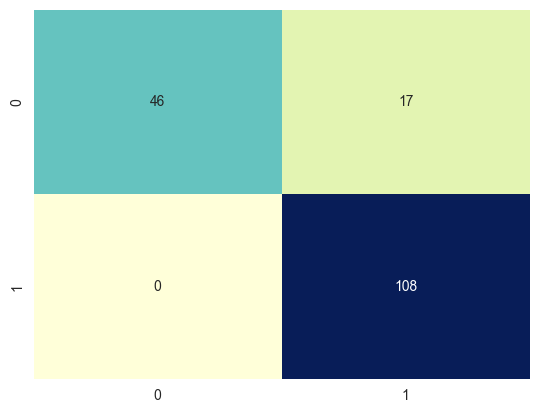

INFO: Accuracy of the model is: 90.06% 



In [58]:
# Se calcula la media y la desviacion estandar de los atributos para cada clase
result = meanAndStdDevForClass(train_data)

# Se obtiene las predicciones de cada uno de las filas del conjunto de pruebas
y_predictions = getPredictions(result, test_data)

#Se genera la matriz de confusion entre los datos reales y la prediccion
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

# Mostramos la presicion del modelo
accuracy = accuracy_rate(test_data, y_predictions)
# Porcentaje de prediccion del modelo:
print("INFO: Accuracy of the model is: {:.2f}% \n".format(accuracy))

### APLICACION DE LA LIBRERIA SKLEARN

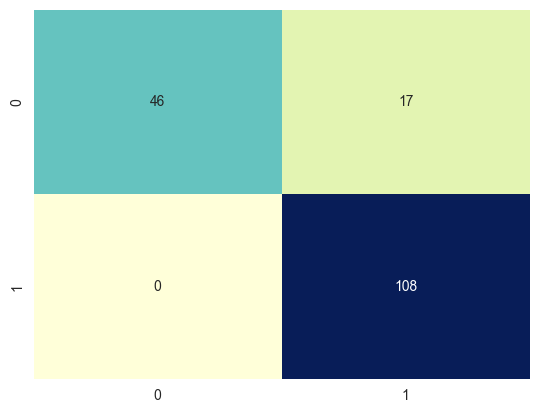

INFO: Accuracy of your model is : 90.06% 

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.84        63
         1.0       0.86      1.00      0.93       108

    accuracy                           0.90       171
   macro avg       0.93      0.87      0.89       171
weighted avg       0.91      0.90      0.90       171



In [59]:
# Se carga el modelo
classifier = GaussianNB()
# Se entrena
classifier.fit(X_train, y_train)
# Se clasifica los datos de prueba
y_predictions = classifier.predict(X_test)

# Se compara los resultados
cm = confusion_matrix(y_test, y_predictions) 
sns.heatmap(cm,annot=True,fmt="d",cbar=False,cmap="YlGnBu")
plt.show()

# Precision del modelo:
print("INFO: Accuracy of your model is : {:.2f}% \n".format(accuracy_score(y_test, y_predictions)*100))
print(classification_report(y_test, y_predictions))

## RED BAYESIANA

Crear la estructura de la red
- Crear los nodos
- creat los bordes

In [44]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness'])
G.add_edges_from([('mean_radius', 'mean_texture'), ('mean_texture', 'mean_perimeter'), ('mean_perimeter', 'mean_radius'), ('mean_radius', 'mean_area'), ('mean_radius', 'mean_texture'), ('mean_radius', 'mean_smoothness'), ('mean_texture', 'mean_smoothness'),])



- Calcular las probabilidades condicionales de cada variable dada la combinación de valores de las variables padres
- Las probabilidades se estiman a partir de los datos y utilizando el siguiente algoritmo

In [45]:
cpd_radius = dataset['mean_radius'].value_counts(normalize=True).sort_index().values
cpd_radius = dataset['mean_texture'].value_counts(normalize=True).sort_index().values
cpd_radius = dataset['mean_perimeter'].value_counts(normalize=True).sort_index().values
cpd_radius = dataset['mean_area'].value_counts(normalize=True).sort_index().values
cpd_radius = dataset['mean_smoothness'].value_counts(normalize=True).sort_index().values
#cpd_radius = dataset['diagnosis'].value_counts(normalize=True).sort_index().values

Dibujar la red bayesiana

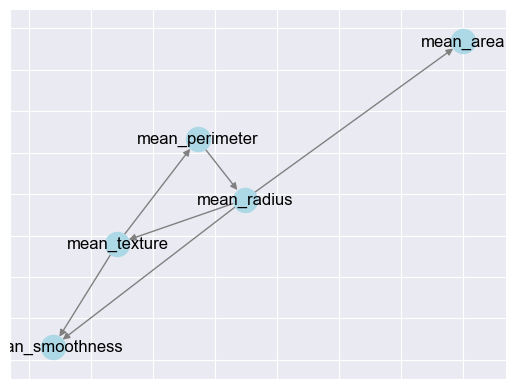

In [46]:
nx.draw_networkx(G, node_color='lightblue', edge_color='gray', font_color='black')

plt.show()